# Wstęp do uczenia maszynowego
##  Praca domowa nr 2
#### Jakub Piwko, Malwina Wojewoda
***
***
***

### Pakiety

In [5]:
import pandas as pd
import plotly.express as px
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')
np.random.seed(23)
from sklearn.model_selection import train_test_split

### Wczytanie i analiza danych

In [2]:
df = pd.read_csv('allegro-api-transactions.csv')
df.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"


#### Analiza braków danych

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420020 entries, 0 to 420019
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lp                      420020 non-null  int64  
 1   date                    420020 non-null  object 
 2   item_id                 420020 non-null  int64  
 3   categories              420020 non-null  object 
 4   pay_option_on_delivery  420020 non-null  int64  
 5   pay_option_transfer     420020 non-null  int64  
 6   seller                  420020 non-null  object 
 7   price                   420020 non-null  float64
 8   it_is_allegro_standard  420020 non-null  int64  
 9   it_quantity             420020 non-null  int64  
 10  it_is_brand_zone        420020 non-null  int64  
 11  it_seller_rating        420020 non-null  int64  
 12  it_location             420020 non-null  object 
 13  main_category           420020 non-null  object 
dtypes: float64(1), int64

W ramce danych nie wystąpują wartości None/Null, więc nie będziemy musieli zajmować się uzupełnianiem brakujących wartości.

#### Rozkłady zmiennych
Pomimo, że niektóre zmienne są typu *int* i *float*, to mogą to być zmienne dyskretne/kategoryczne. Sprawdźmy to zatem:

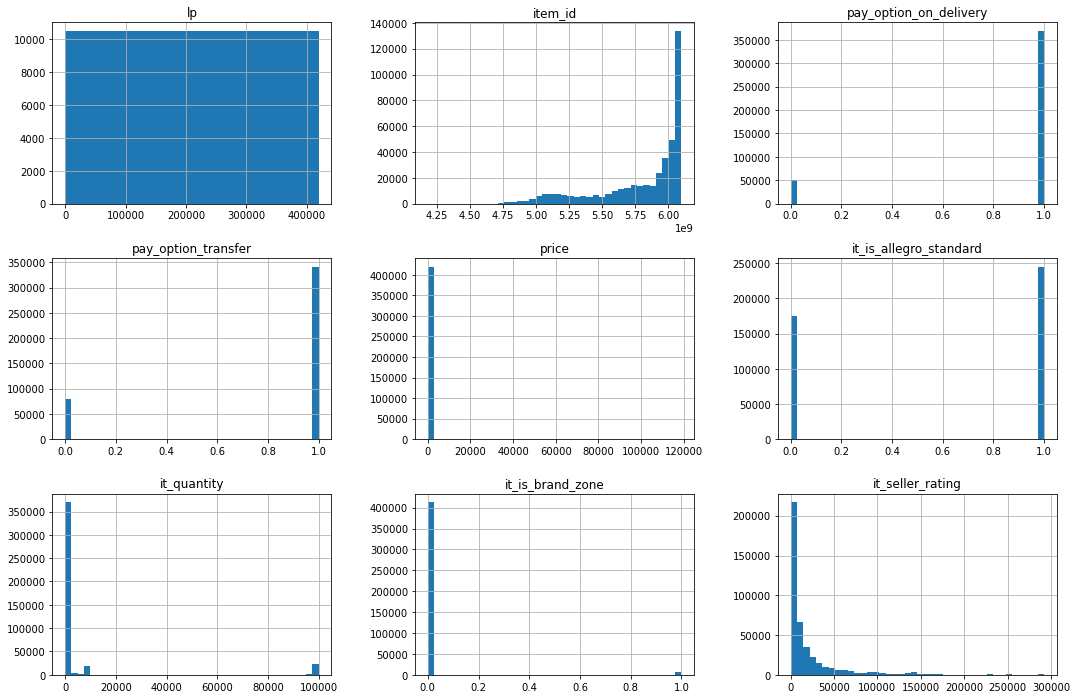

In [19]:
df.hist(figsize=(18, 12), bins=40)
plt.show()

Mimo, że z histogramu niektóre wielkości wyglądają na kategoryczne lepiej upewnic się korzystając ze zliczenia występujących wartości:

In [13]:
df['pay_option_on_delivery'].value_counts()

1    368766
0     51254
Name: pay_option_on_delivery, dtype: int64

In [15]:
df['pay_option_transfer'].value_counts()

1    341264
0     78756
Name: pay_option_transfer, dtype: int64

In [20]:
df['it_is_allegro_standard'].value_counts()

1    245063
0    174957
Name: it_is_allegro_standard, dtype: int64

In [22]:
df['it_is_brand_zone'].value_counts()

0    413008
1      7012
Name: it_is_brand_zone, dtype: int64

In [21]:
df['it_quantity'].value_counts()

0        63480
1        11349
2         8579
3         7234
4         6865
         ...  
19969        1
7997         1
3314         1
8106         1
65505        1
Name: it_quantity, Length: 7305, dtype: int64

In [16]:
df['price'].value_counts()

1.00      7904
9.99      4441
19.99     4201
99.00     3583
15.00     3393
          ... 
58.66        1
443.00       1
169.87       1
209.49       1
116.62       1
Name: price, Length: 9722, dtype: int64

Widać więc, że zmienne *pay_option_on_delivery*, *pay_option_transfer*, *it_is_allegro_standard*, *it_is_brand_zone* są kategoryczne z dwiema wartościami: 0 i 1. Natomiast zmienne *it_quantity* oraz *price* okazały się być ciągłe.

In [ ]:
NIE WIEM  W SUMIE CO Z TYMI CO MAJA TYP OBJECT

### Podział na zbiór treningowy, testowy i walidacyjny

In [6]:
#Wyróżnienie zbioru, na którym będziemy pracować i zbiory do walidacji
X, X_valid = sklearn.model_selection.train_test_split(
    df,
    test_size=0.30, random_state=100)

#Wyróżnienie zbioru treningowego i testowego
X_train, X_test = sklearn.model_selection.train_test_split(
    X,
    test_size=0.30, random_state=100)

### Zamiana zmiennych ciągłych na kategoryczne

Nie ma sensu zmienać zmiennej *item_id* ponieważ to numer identyfikujący konketną rzecz. Do zmiany pozostają zatem tylko zmienne *price*, *it_quantity* i *it_seller_rating*.